# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [201]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [202]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [203]:
sinasc_simplificada = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_simplificada

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [204]:
sinasc_simplificada.dropna()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27021,Colorado do Oeste,25,38.0
27022,Vilhena,34,33.0
27023,Vilhena,32,35.0
27025,Vilhena,24,30.0


In [205]:
media_idade = sinasc_simplificada.dropna().groupby('munResNome').mean()
media_idade

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [206]:
 sinasc_peso = sinasc_raw[['DTNASC', 'PESO','SEXO', 'ESCMAE']]
sinasc_peso

,DTNASC,PESO,SEXO,ESCMAE
0,2019-02-19,3685,Masculino,8 a 11 anos
1,2019-02-21,3055,Feminino,8 a 11 anos
2,2019-02-25,3460,Feminino,8 a 11 anos
3,2019-03-20,2982,Feminino,12 anos ou mais
4,2019-03-23,3310,Feminino,8 a 11 anos
...,...,...,...,...
27023,2019-12-13,2110,Masculino,12 anos ou mais
27024,2019-10-04,3310,Masculino,8 a 11 anos
27025,2019-08-02,3065,Masculino,8 a 11 anos
27026,2019-12-23,2352,Masculino,8 a 11 anos


In [207]:
aniversario = sinasc_peso[sinasc_peso['DTNASC'] == '2019-05-13'].groupby(['ESCMAE', 'SEXO']).agg({'DTNASC': 'first', 'PESO': 'mean'})
aniversario

DTNASC         PESO
ESCMAE          SEXO                              
1 a 3 anos      Masculino  2019-05-13  3215.000000
12 anos ou mais Feminino   2019-05-13  3309.470588
                Masculino  2019-05-13  3371.875000
4 a 7 anos      Feminino   2019-05-13  3107.875000
                Masculino  2019-05-13  3340.181818
8 a 11 anos     Feminino   2019-05-13  3114.500000
                Masculino  2019-05-13  3181.472222

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [208]:
sinasc_raw['munResNome'].value_counts()

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [209]:
sinasc_muni = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_muni

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [210]:
muni_nasc = sinasc_raw.groupby('munResNome')['DTNASC'].count().sort_values().head(2)
muni_nasc

munResNome
Município ignorado - RO     1
Castanheiras               32
Name: DTNASC, dtype: int64

In [211]:
sinasc_muni = sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras'][['IDADEMAE', 'IDADEPAI']]
sinasc_muni.agg(['min', 'median', 'max']).T

,min,median,max
IDADEMAE,17.0,27.0,39.0
IDADEPAI,17.0,31.5,43.0


In [212]:
 sinasc_desc = sinasc_muni.describe().T
sinasc_desc

,count,mean,std,min,25%,50%,75%,max
IDADEMAE,32.0,27.281250,5.335423,17.0,23.75,27.0,31.0,39.0
IDADEPAI,28.0,30.392857,6.843972,17.0,26.50,31.5,35.0,43.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [221]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['DTNASC'].head()

0   2019-02-19
1   2019-02-21
2   2019-02-25
3   2019-03-20
4   2019-03-23
Name: DTNASC, dtype: datetime64[ns]

In [292]:
sinasc_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]
sinasc_marco['DTNASC']

3       2019-03-20
4       2019-03-23
5       2019-03-27
9       2019-03-11
10      2019-03-11
           ...    
13670   2019-03-21
13671   2019-03-22
13736   2019-03-07
13748   2019-03-30
13750   2019-03-09
Name: DTNASC, Length: 2456, dtype: datetime64[ns]

In [230]:
sinasc_marco['munResNome'].value_counts()

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

In [258]:
cidade_porto = sinasc_marco[sinasc_marco['munResNome'] == 'Porto Velho'].groupby('munResNome')

In [274]:
cidade_porto[['QTDFILVIVO', 'QTDFILMORT']].agg(['min',  'mean', 'max'])

QTDFILVIVO                QTDFILMORT               
                   min      mean  max        min      mean  max
munResNome                                                     
Porto Velho        0.0  1.295056  9.0        0.0  0.352734  4.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [215]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [216]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [217]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [300]:
mes = sinasc_raw['DTNASC']
nascimentos = mes.dt.month
nascimentos

0         2
1         2
2         2
3         3
4         3
         ..
27023    12
27024    10
27025     8
27026    12
27027    12
Name: DTNASC, Length: 27028, dtype: int32

In [323]:
quant_nasc = nascimentos.value_counts()
mes_final = quant_nasc.sort_values(ascending = False)
mes_arrumado = mes_final.sort_index()
mes_arrumado

DTNASC
1     2263
2     2125
3     2456
4     2373
5     2365
6     2176
7     2160
8     2199
9     2357
10    2270
11    2148
12    2136
Name: count, dtype: int64

Text(0, 0.5, 'Qtd de Nascimento')

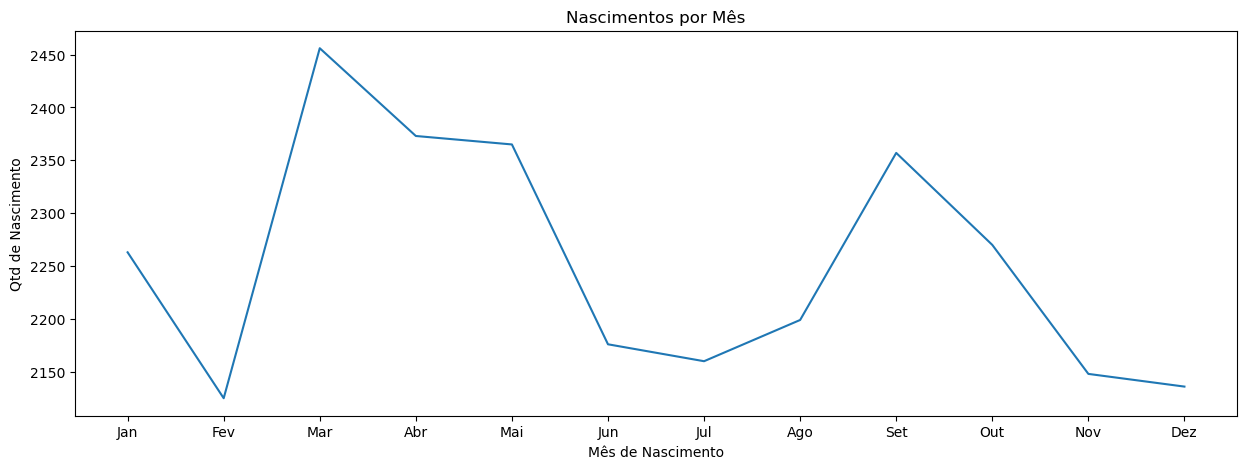

In [328]:
fig, ax = plt.subplots(figsize=[15,5])
mes_arrumado.plot()
ax.set_xticks(mes_arrumado.index)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title('Nascimentos por Mês')
plt.xlabel('Mês de Nascimento')
plt.ylabel('Qtd de Nascimento')

In [331]:
(2263-2136)/2263 * 100

5.612019443216969

Analisando o gráfico, é evidente que o mês de março apresenta o maior índice de nascimentos. No entanto, a discrepância entre março e o mês com o maior número de nascimentos, dezembro (o menor índice), é praticamente irrelevante, alcançando apenas 5,6%. Apesar dessa diferença modesta, é crucial não subestimar o impacto, especialmente considerando que março é o período em que ocorre o pico de nascimentos. Este padrão sugere que a concepção desses bebês ocorre em junho, um período festivo em diversas regiões do Brasil, principalmente no Nordeste. Além disso, junho coincide com as férias escolares e oferece um clima de inverno mais propício para atividades íntimas.

Diante desse contexto, é recomendável intensificar as campanhas de conscientização sobre o uso de preservativos e reforçar a importância do acompanhamento médico em casos de gravidez. Isso contribuirá para uma abordagem preventiva e para o bem-estar geral da população.